Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Data Assignment #5  
Date: 11/03/21  
I did not attempt the bonus activity.  
Description: This program uses Jupyter Notebook to tell an EDA story and execute various tasks.

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Our Patients' Exploratory Data Analysis Story

## Attribute Descriptions:
1. ID (integer): Index of the dataset. Counting numbers starting at 0.
2. Gender (string): Gender of the patient, "M" for male and "F" for female.
3. Age (integer): Age of the patient in years
4. Marital Status (string): Description of the patient's marital status. No coding system enforced.
5. RIC (integer): RIC of the patient assigned according to Appendix B in the Centers for Medicaid and Medicare Services IRF-PAI training manual.
6. Admission Total FIM Score: The admission total Functional Independence Measure (FIM) score of the patient.
    * The FIM is a clinical assessment used to measure patient functioning at inpatient rehabilitation hospitals.  
    * The FIM is measured at two distinct points in time: admission and discharge.
    * The FIM measures the level of assistance required to perform 18 activities of daily living (ADL) tasks (e.g. eating, walking, problem-solving, etc.).
    * The tasks are categorized as either motor (13 tasks) or cognitive (5 tasks). Each task is scored on a 7-point ordinal scale to measure independence   
    as determined by the amount of assistance required to perform each ADL task.
        * For more information about the FIM, see Section III in the Centers for Medicaid and Medicare Services IRF-PAI training manual.
        * Discharge Total FIM Score: The discharge total FIM score of the patient.

### Loading the Data
* Let's load the data into a Pandas DataFrame.

In [125]:
uncleaned_patient_data = pd.read_csv("patient_data_to_clean.csv", index_col="ID")
uncleaned_patient_data_df = pd.DataFrame(uncleaned_patient_data)

### Cleaning the Data
* Now we have to prepare the data to adhere to a strict coding system, to make proper sense of our data.
* We will utilize various functions below to clean our data.

In [126]:
# clean marital status entries from free response to our strict coding system
def clean_marital_status_column(patient_entry, system_equivalent):
    for i in range(len(uncleaned_patient_data_df)):
        if(patient_entry in uncleaned_patient_data_df.at[i, "Marital Status"]):
            uncleaned_patient_data_df.at[i, "Marital Status"] = system_equivalent

In [127]:
# establish a key dictionary with user numbers mapped to RIC values
ric_key_dictionary = {1: "Stroke", 2: "TBI", 3: "NTBI", 4: "TSCI", 5: "NTSCI", 6: "Neuro", 7: "FracLE", 8: "ReplLE", 9: "Ortho", 10: "AMPLE", 11: "AMP-NLE", 12: "OsteoA", 13: "RheumA", 14: "Cardiac", 15: "Pulmonary", 16: "Pain", 17: "MMT-NBSCI", 18: "MMT-BSCI", 19: "GB", 20: "Misc", 21: "Burns"}

In [128]:
# clean and replace numeric values with their RIC values
def encode_RIC_values():
    uncleaned_patient_data_df["RIC"] = uncleaned_patient_data_df["RIC"].astype(str)
    for x in range(len(uncleaned_patient_data_df)):
        for i in range(21):
            j = str(i)
            if(uncleaned_patient_data_df.at[x,"RIC"] == j):
                value1 = uncleaned_patient_data_df.at[x,"RIC"]
                uncleaned_patient_data_df.at[x,"RIC"] = ric_key_dictionary[int(value1)]

In [129]:
# calculate the sum of the numeric column
def calculate_sum(column_name, search_value):
    sum = 0
    for i in range(len(uncleaned_patient_data_df)):
        if (uncleaned_patient_data_df.at[i, column_name] == search_value):
            sum += 1
    return sum

In [130]:
# replace appropriate marital status values with NaN
def assigning_NaN():
    for x in range(len(uncleaned_patient_data_df)):
        if (uncleaned_patient_data_df.at[x, "Marital Status"] != "Divorced" and uncleaned_patient_data_df.at[x, "Marital Status"] != "Never Married" and uncleaned_patient_data_df.at[x, "Marital Status"] != "Married" and uncleaned_patient_data_df.at[x, "Marital Status"] != "Widowed" and uncleaned_patient_data_df.at[x, "Marital Status"] != "Separated"):
            uncleaned_patient_data_df.at[x, "Marital Status"] = "NaN"

In [131]:
# clean martial status column for all possible user entries

clean_marital_status_column("WID", "Widowed")
clean_marital_status_column("wid", "Widowed")
clean_marital_status_column("Wid", "Widowed")

clean_marital_status_column("DIV", "Divorced")
clean_marital_status_column("Div", "Divorced")
clean_marital_status_column("div", "Divorced")

clean_marital_status_column("SEP", "Seperated")
clean_marital_status_column("Sep", "Seperated")
clean_marital_status_column("sep", "Seperated")

clean_marital_status_column("Sin", "Single")
clean_marital_status_column("SIN", "Single")
clean_marital_status_column("sin", "Single")

clean_marital_status_column("NEV", "Single")
clean_marital_status_column("Nev", "Single")
clean_marital_status_column("nev", "Single")

clean_marital_status_column("mar", "Married")
clean_marital_status_column("Mar", "Married")
clean_marital_status_column("MAR", "Married")

clean_marital_status_column("Sin", "Never Married")

assigning_NaN()
encode_RIC_values()

### Building a Pandas Series of statistics
* patients_total: total number of patients
* males_total: total number of males
* females_total: total number of females
* married_total: total number of married patients
* most_common_RIC: RIC label for the most commonly occurring RIC
* most_common_RIC_total: total number of patients with the most commonly occurring RIC
* stroke_age_avg: average age for stroke patients
* stroke_age_std: standard deviation of age for stroke patients
* stroke_age_male_avg: average age for male stroke patients
* stroke_age_male_std: standard deviation of age for male stroke patients
* stroke_age_female_avg: average age for female stroke patients
* stroke_age_female_std: standard deviation of age for female stroke patients

In [132]:
# calculate statistics from data
patients_total = len(uncleaned_patient_data_df)
males_total = calculate_sum("Gender", "M")
females_total = calculate_sum("Gender", "F")
married_total = calculate_sum("Marital Status", "Married")
most_common_RIC = uncleaned_patient_data_df["RIC"].value_counts().idxmax()
most_common_RIC_total = calculate_sum("RIC", most_common_RIC)


stroke_data = []
stroke_male_age = []
stroke_female_age = []

for i in range(len(uncleaned_patient_data_df)):
    if (uncleaned_patient_data_df.at[i, "RIC"] == most_common_RIC):
        stroke_data.append(uncleaned_patient_data_df.at[i, "Age"])
        if (uncleaned_patient_data_df.at[i, "Gender"] == 'M'):
            stroke_male_age.append(uncleaned_patient_data_df.at[i, "Age"])
        else:
            stroke_female_age.append(uncleaned_patient_data_df.at[i, "Age"])

In [133]:
# calculate statistics from stroke data
stroke_data = pd.Series(stroke_data)
stroke_age_avg = stroke_data.mean()
stroke_age_std = stroke_data.std()

stroke_male_age = pd.Series(stroke_male_age)
stroke_female_age = pd.Series(stroke_female_age)

stroke_age_male_avg = stroke_male_age.mean()
stroke_age_male_std = stroke_male_age.std()
stroke_age_female_avg = stroke_female_age.mean()
stroke_age_female_std = stroke_female_age.std()

patient_data_stats = [patients_total, females_total, males_total, married_total, most_common_RIC, most_common_RIC_total, stroke_age_avg, stroke_age_std, stroke_age_male_avg, stroke_age_male_std, stroke_age_female_avg, stroke_age_female_std]
patient_data_series = pd.Series(patient_data_stats)
print(patient_data_series)


uncleaned_patient_data_df.to_csv("cleaned_patient_data.csv")

0          4555
1          2313
2          2242
3          2261
4        Stroke
5          1169
6     71.292558
7     14.340883
8      70.07743
9     13.841474
10    72.604982
11    14.761702
dtype: object


### Visualizing the Data
Now, we can produce scatter plots and histogram graphs representing our data.

* Let's start with the scatterplot!

In [134]:
def generate_scatter_plot_graph(RIC_value):
    female_ATFM = []
    male_ATFM = []
    female_DTFM = []
    male_DTFM = []
    num_females = 0
    num_males = 0

    # count number of RICs
    num_RICs = 0
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            num_RICs += 1
    title = str(RIC_value) + "(N=" + str(num_RICs) + ")"
    
    # female Admission Total FIM score
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            if uncleaned_patient_data_df.at[i,"Gender"] == 'F':
                female_ATFM.append(uncleaned_patient_data_df.at[i,"Admission Total FIM Score"])
                num_females += 1

    # male Admission Total FIM Score
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            if uncleaned_patient_data_df.at[i,"Gender"] == 'M':
                male_ATFM.append(uncleaned_patient_data_df.at[i,"Admission Total FIM Score"])
                num_males += 1
   
    # female Discharge Total FIM Score
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            if uncleaned_patient_data_df.at[i,"Gender"] == 'F':
                female_DTFM.append(uncleaned_patient_data_df.at[i,"Discharge Total FIM Score"])

    # male Discharge Total FIM Score
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            if uncleaned_patient_data_df.at[i,"Gender"] == 'M':
                male_DTFM.append(uncleaned_patient_data_df.at[i,"Discharge Total FIM Score"])

    # set range of values to graph
    x_range = list(range(0,140))
    y_range = list(range(0,140))
   
    female_label = "Female (N=" + str(num_females) + ")"
    male_label = "Male (N=" + str(num_males) + ")"

    plt.figure()
    plt.scatter(female_ATFM, female_DTFM, color="red", marker="+", s=100, label=female_label)
    plt.scatter(male_ATFM, male_DTFM, color="blue", marker=".", s=100, label=male_label)
    plt.plot(x_range, y_range, color="black", linestyle="--", label="No Change")
    plt.title(title)
    plt.xlabel("Admission FIM Score")
    plt.ylabel("Discharge FIM Score")
    plt.legend(loc=4)
    plt.show()

In [135]:
# determine if RIC has enough data, which I am setting to be at least 300 entries
RICs_to_graph = []
def calculate_RICs_to_graph(RIC_value):
    RIC_count = 0
    for i in range(len(uncleaned_patient_data_df)):
        if uncleaned_patient_data_df.at[i,"RIC"] == RIC_value:
            RIC_count += 1

    if(RIC_count >= 300):
        RICs_to_graph.append(RIC_value)
    return RICs_to_graph

RICs = []
calculate_RICs_to_graph("Stroke")
calculate_RICs_to_graph("TBI")
calculate_RICs_to_graph("TSCI")
calculate_RICs_to_graph("NTSCI")
calculate_RICs_to_graph("Neuro")
calculate_RICs_to_graph("FracLE")
calculate_RICs_to_graph("ReplLE")
calculate_RICs_to_graph("Ortho")
calculate_RICs_to_graph("AMPLE")
calculate_RICs_to_graph("AMP-NLE")
calculate_RICs_to_graph("OsteoA")
calculate_RICs_to_graph("RheumA")
calculate_RICs_to_graph("Cardiac")
calculate_RICs_to_graph("Pulmonary")
calculate_RICs_to_graph("Pain")
calculate_RICs_to_graph("MMT-NBSCI")
calculate_RICs_to_graph("MMT-BSCI")
calculate_RICs_to_graph("GB")
calculate_RICs_to_graph("Misc")
RICs = calculate_RICs_to_graph("Burns")

print(RICs)


['Stroke', 'FracLE', 'ReplLE', 'Cardiac', 'Misc']


In [136]:
def generate_all_scatter_plot_graphs():
    generate_scatter_plot_graph("Stroke")
    generate_scatter_plot_graph("FracLE")
    generate_scatter_plot_graph("Cardiac")
    generate_scatter_plot_graph("Misc")

Now let's code up the Bar Graphs!
* Calculation formulas may be helpful in this process...
    * Standard deviation = $\sigma=\sqrt{\frac{sum_{}(x_i-\mu)^2}{N}}$
    * Mean = $\mu=\frac{x}{y}$

In [137]:
def generate_histogram_graph(RIC_value):
    age_list = []
    num_ages = 0
    for i in range(len(uncleaned_patient_data_df)):
        if(uncleaned_patient_data_df.at[i,"RIC"] == RIC_value):
            age_list.append(uncleaned_patient_data_df.at[i,"Age"])
            num_ages += 1
    age_list = pd.Series(age_list)
    age_mean = round(age_list.mean(), 2)
    age_stdev = round(age_list.std(), 2)

    title = RIC_value + "Age (N=" + str(num_ages) + "): Mean=" + str(age_mean) + "StdDev=" + str(age_stdev)

    plt.figure()
    plt.hist(age_list, bins=30, color="green")
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

In [138]:
def generate_all_histogram_graphs():
    generate_histogram_graph("Stroke")
    generate_histogram_graph("FracLE")
    generate_histogram_graph("Cardiac")
    generate_histogram_graph("Misc")

* Below we will call our main function to generate our scatter plots and histogram graphs for the RIC values with enough data (>= 300 entries)!

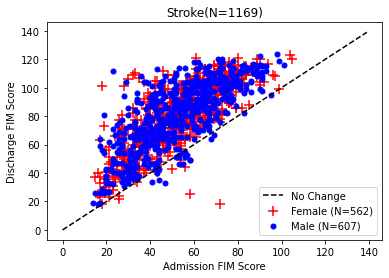

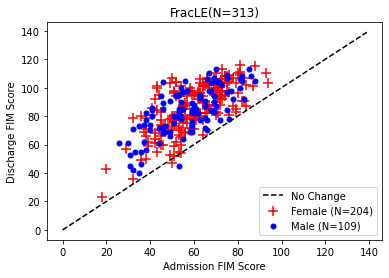

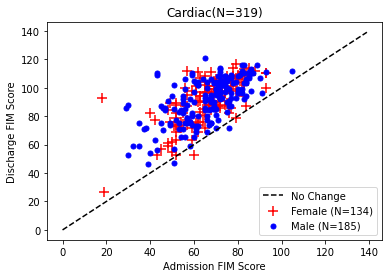

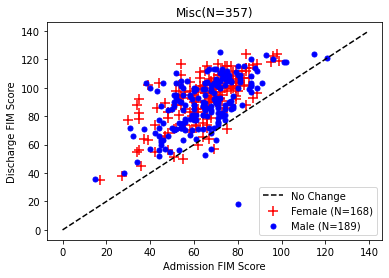

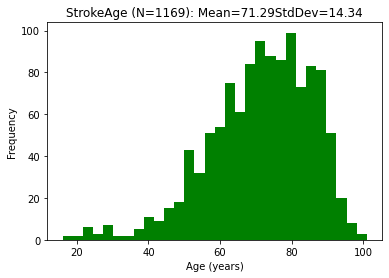

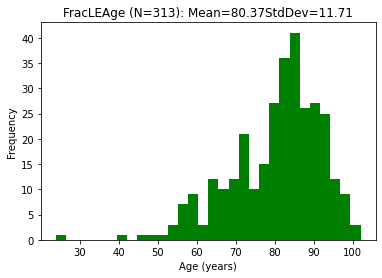

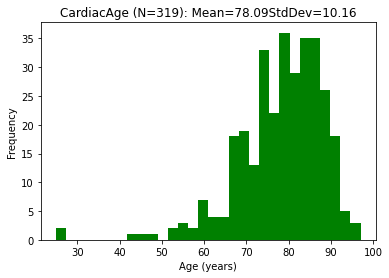

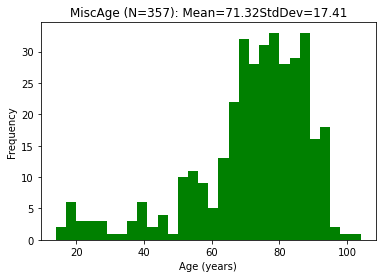

In [139]:
def main():
    generate_all_scatter_plot_graphs()
    generate_all_histogram_graphs()

main()
    